# 프로젝트 개요
---
- 강의명 : 산대특_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 머신러닝 기초
- 프로젝트 주제 : wine 데이터를 활용한 분류 모형 만들기
- 프로젝트 마감일 : 2022년 10월 21일 금요일
- 수강생명 : 황지훈
---

## Step1. 데이터 수집


### 1-1. wine 데이터 세팅

In [105]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head(5)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 1-2. wine데이터 정보
- 총 6497개의 데이터
- 각 열 정보
  - alcoho : 각 와인의 알코올 도수
  - sugar : 각 와인의 당도
  - pH : 각 와인의 수소 이온 농도 지수(pH값)
  - class : 레드와인(0) / 화이트와인(1)

In [106]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


### 1-3. wine 데이터 평균 / 표준편차
- describe 함수를 사용하여 Wine 데이터의 변수별 평균과 표준편차를 구한다

In [151]:
dc = wine.describe()

dc.loc[['mean','std'],['alcohol','sugar','pH']]

,alcohol,sugar,pH
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787


---
<br/>

## Step2. 데이터 시각화
- 각각의 변수들의 조합의 산점도를 통한 데이터 시각화
- 각 산점도 클래스별로 분리하여 시각화 (레드와인 / 화이트와인)

### 2-1. 산점도 : 알콜도수 / 당도

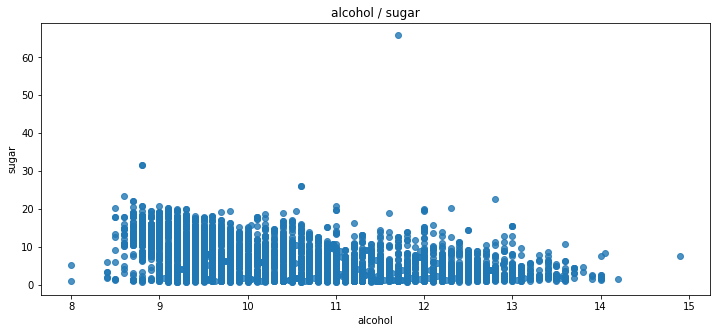

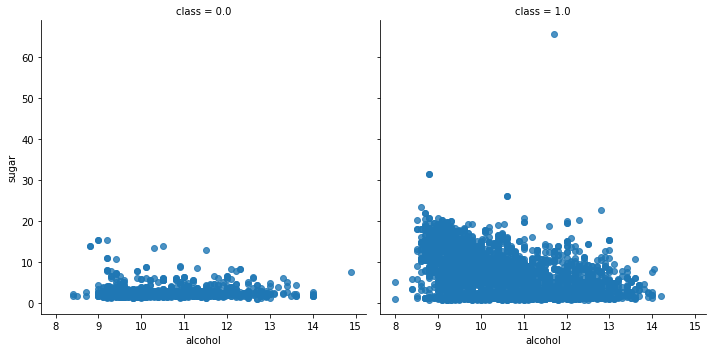

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))
ax=sns.regplot(x='alcohol', y='sugar', data = wine, fit_reg = False)
ax.set_title('alcohol / sugar')

sns.lmplot(x='alcohol', y='sugar', col = 'class', data = wine, fit_reg = False, height =5)

plt.show()

### 2-2. 산점도 : 알콜도수 / pH


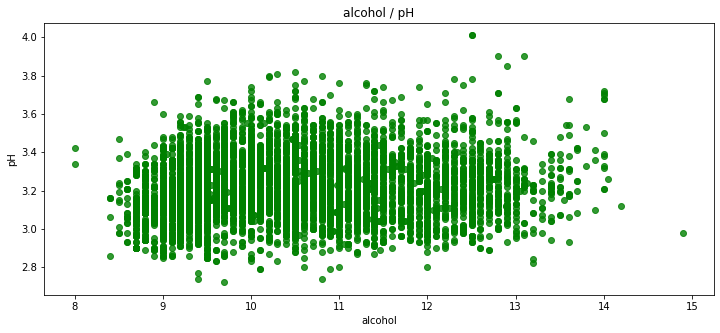

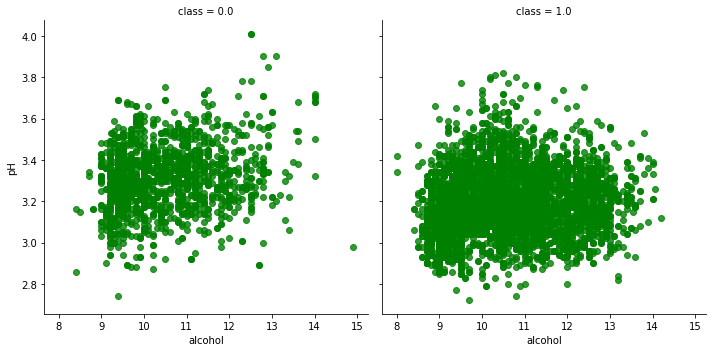

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))
ax=sns.regplot(x='alcohol', y='pH', data = wine, fit_reg = False, color = 'green')
ax.set_title('alcohol / pH')

sns.lmplot(x='alcohol', y='pH', col = 'class', data = wine, fit_reg = False, height = 5, scatter_kws={'color':'green'})

plt.show()

### 2-3. 산점도 : pH / 당도


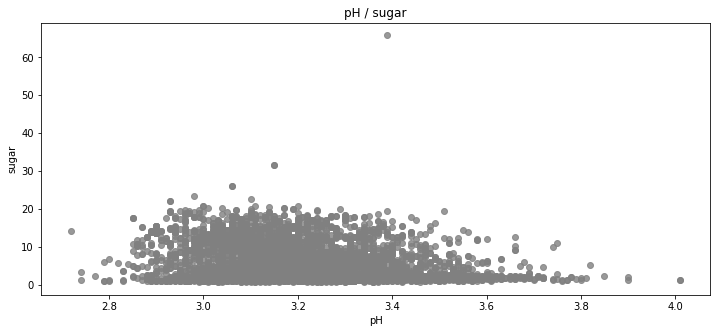

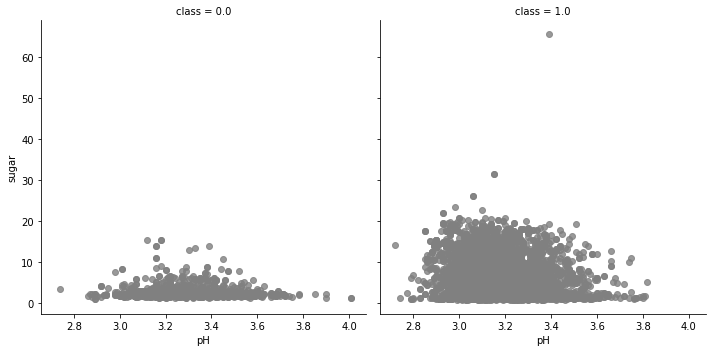

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))
ax=sns.regplot(x='pH', y='sugar', data = wine, fit_reg = False, color='gray')
ax.set_title('pH / sugar')

sns.lmplot(x='pH', y='sugar', col = 'class', data = wine, fit_reg = False, height = 5, scatter_kws={'color':'gray'})

plt.show()

---
<br/>

## Step3. Feature Engineering 및 데이터 분리

### 3-1. 데이터 세트 준비
- 데이터 세트 분리

In [111]:
from sklearn.model_selection import train_test_split

# data / target 분리
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 데이터 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

- 교차 검증을 위한 데이터 세트를 준비

In [112]:
# 교차 검증 데이터 세트 준비
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

### 3-2. 데이터 표준화

In [113]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
ss.fit(sub_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

sub_scaled = ss.transform(sub_input)
val_scaled = ss.transform(val_input)

---
<br/>

## Step4. 머신러닝 모델링

### 4-1. Model1 - DecisionTree

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

dt =  DecisionTreeClassifier(random_state = 42)

params = {'max_depth' : randint(2,10)}

rs = RandomizedSearchCV(dt, params, n_iter = 100 , random_state = 42 ,n_jobs = -1)
rs.fit(sub_scaled, sub_target)


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f98c9588f90>},
                   random_state=42)

### 4-2. Model2 - RandomForest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 5, n_jobs=-1, random_state=42)
rf.fit(sub_scaled, sub_target)


RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

### 4-3. Model3 - GradientBoosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 500, random_state=42)
gb.fit(sub_scaled, sub_target)


GradientBoostingClassifier(n_estimators=500, random_state=42)

---
<br/>

## Step5. 머신러닝 평가

### 5-1. Model1 정확도

In [143]:
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(rs, train_input, train_target, return_train_score = True, n_jobs = -1, cv=5)

print('훈련 데이터 :', np.mean(scores['train_score']))
print('테스트 데이터 :', np.mean(scores['test_score']))

훈련 데이터 : 0.8869077616491616
테스트 데이터 : 0.8554941881987117


### 5-2. Model2 정확도

In [144]:
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs = -1, cv=5)

print('훈련 데이터 :', np.mean(scores['train_score']))
print('테스트 데이터 :', np.mean(scores['test_score']))

훈련 데이터 : 0.8696363615536095
테스트 데이터 : 0.8608834308136523


### 5-3. Model3 정확도

In [145]:
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1, cv=5)

print('훈련 데이터 :', np.mean(scores['train_score']))
print('테스트 데이터 :', np.mean(scores['test_score']))

훈련 데이터 : 0.9215896435285418
테스트 데이터 : 0.8749283704745687


---